<a href="https://colab.research.google.com/github/Martika98/Interview_task/blob/main/zadanie_rekrutacyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

Importing data into a dataframe, semicolon as a  separator
Setting datatype as string

In [ ]:
train_data = pd.read_csv("training.csv", sep = ';')
train_data.v2 = train_data.v2.astype(str)
train_data.v7 = train_data.v7.astype(str)
train_data.v15 = train_data.v15.astype(str)

val_data = pd.read_csv("validation.csv", sep = ';')
val_data.v2 = val_data.v2.astype(str)
val_data.v7 = val_data.v7.astype(str)
val_data.v15 = val_data.v15.astype(str)

In [ ]:
train_data.head(10)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v14,v15,classLabel
797,0.0,29.50,0.000046,0.0,-4.772397,0.660170,0.540,1,1,4,0,0,500,3800000.0,1
1082,1.0,19.17,0.000000,1.0,-0.228835,0.680230,0.000,0,0,0,1,1,1,5000000.0,1
849,1.0,25.67,0.001250,0.0,2.956460,0.632776,1.210,1,1,67,1,0,258,1400000.0,1
333,0.0,18.83,0.000954,0.0,-1.172233,0.821603,0.085,1,0,0,0,0,0,1000000.0,1
919,0.0,33.67,0.000037,0.0,-1.128066,0.629964,0.375,0,0,0,0,0,44,3000000.0,1
2234,0.0,44.17,0.000666,0.0,-0.312252,0.727879,7.375,1,1,3,1,0,0,0.0,1
3287,1.0,59.67,0.000154,0.0,-1.196493,0.717449,0.125,1,0,0,1,0,0,2600000.0,1
3466,0.0,36.00,0.000100,0.0,1.572031,0.775126,2.000,1,1,11,0,0,456,0.0,1
2432,1.0,42.50,0.000491,1.0,3.391225,0.864584,3.165,1,0,0,1,0,1442,520000.0,1
1091,1.0,65.42,0.001100,0.0,1.570521,0.940997,20.000,1,1,7,1,0,0,220000.0,1


In [ ]:
(train_data['v17']==train_data['classLabel']).count()

3700

In [ ]:
val_data.head(11)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,b,"32,33","0,00075",u,"0,840107307","0,544982291","1,585",t,f,0,t,s,420.0,0,4200000,NaN,1,no.
1,b,"23,58","0,000179",u,"-4,174395711","0,864361709","0,54",f,f,0,t,g,136.0,1,1360000,NaN,0,no.
2,b,"36,42","7,50E-05",y,"2,23222567","0,627475551","0,585",f,f,0,f,g,240.0,3,2400000,NaN,1,no.
3,b,"18,42","0,0010415",y,"-2,469969629","0,846741022","0,125",t,f,0,f,g,120.0,375,1200000,NaN,0,no.
4,b,"24,5","0,0013335",y,"-3,149422333","0,321087006","0,04",f,f,0,t,g,120.0,475,1200000,f,1,no.
5,a,"39,08","4,00E-04",u,"-0,503893639","0,799051454",3,f,f,0,f,g,480.0,0,4800000,f,0,no.
6,b,"23,42","1,00E-04",u,"-2,810378929","0,73844739","0,5",f,f,0,t,s,280.0,0,2800000,NaN,1,no.
7,b,"29,58","0,000475",u,"-3,487245305","0,473373749",2,f,t,1,t,g,460.0,68,4600000,t,0,no.
8,b,"27,42","0,00125",u,"1,208498753","0,677835585","0,25",f,f,0,t,g,720.0,0,7200000,f,1,no.
9,b,"58,58","0,000271",u,"2,338491785","0,315189255","2,415",f,f,0,t,g,320.0,0,3200000,NaN,0,no.


Function str2float replaces commas with dots


In [ ]:
def str2float(df, col_list):
  for col_name in col_list:
    df[col_name] = df[col_name].apply(lambda x: float(x.replace(',', '.')))

List of column names with comma instead of dots

In [ ]:
col_list = ['v2', 'v3', 'v5', 'v7', 'v6', 'v15']
str2float(train_data, col_list)
str2float(val_data, col_list)

Remaining columns with type 'object'

In [ ]:
rest_col_names = list(train_data.columns[train_data.dtypes == object])
print(rest_col_names)

['v1', 'v4', 'v8', 'v9', 'v11', 'v12', 'v16', 'classLabel']


Analizing unique columns values

In [ ]:
train_data['v1'].unique()
train_data['v4'].unique()
train_data['v12'].unique()
train_data['v16'].unique()
train_data['classLabel'].unique() #v8/9/11/16


array(['no.', 'yes.'], dtype=object)

In [ ]:
print(val_data['v17'].unique())

[1 0]


In [ ]:
print(val_data['v1'].unique())
print(val_data['v4'].unique())
print(val_data['v12'].unique())
print(val_data['classLabel'].unique()) #v8/9/11/16
print(val_data['v16'].unique())
print(val_data['v11'].unique())
print(val_data['v9'].unique())
print(val_data['v8'].unique())

['b' 'a' nan]
['u' 'y' nan]
['s' 'g' 'p' 'o']
['no.' 'yes.']
[nan 'f' 't']
['t' 'f']
['f' 't']
['t' 'f']


v1 -> a/b   v4 -> u/y/l  v12 -> g/s/p  v8/9/11/16 -> t/f   classLabel -> yes./no.

Dict containing data to factorize values from letters to numbers

In [ ]:
factorize_dict = {
    'a': 0,
    'b': 1,

    'u': 0,
    'y': 1,
    'l': 2,

    'f': 0,
    't': 1,

    'g': 0,
    's': 1,
    'p': 2,
    'o': 3,

    'no.': 0,
    'yes.': 1,

    'nan': np.nan,
    np.nan: np.nan,
    None: np.nan

}

Factorizing function

In [ ]:
def factorize(df, col_list, factorize_dict):
  for col_name in col_list:
    df[col_name] = df[col_name].apply(lambda x: factorize_dict[x])

In [ ]:
factorize(train_data, rest_col_names, factorize_dict)
factorize(val_data, rest_col_names, factorize_dict)

In [ ]:
train_data.dtypes

v1            float64
v2            float64
v3            float64
v4            float64
v5            float64
v6            float64
v7            float64
v8              int64
v9              int64
v10             int64
v11             int64
v12             int64
v13           float64
v14             int64
v15           float64
v16           float64
v17             int64
classLabel      int64
dtype: object

Creating correlation matrix

In [ ]:
train_corr = train_data.corr()
val_corr = val_data.corr()

<Axes: >

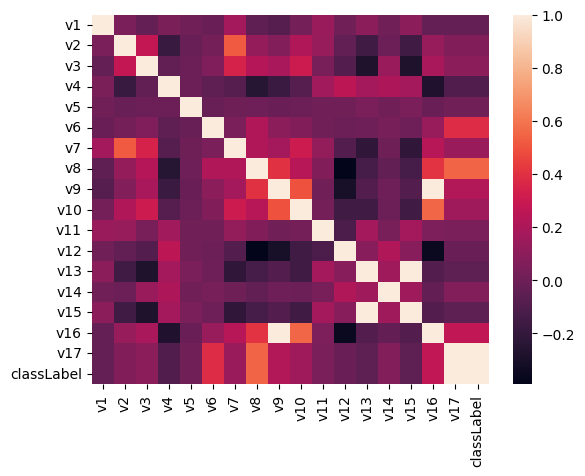

In [ ]:
sns.heatmap(data=train_corr)

<Axes: >

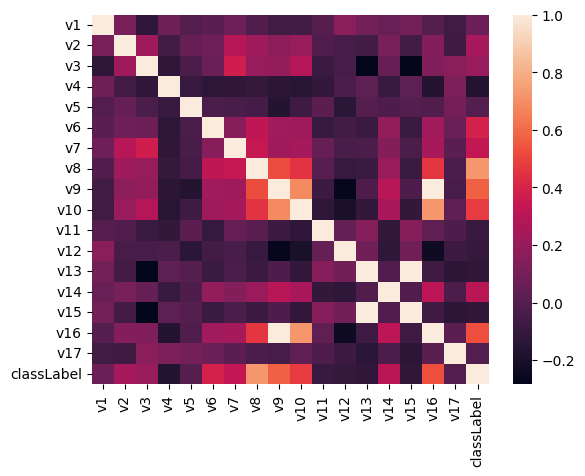

In [ ]:
sns.heatmap(data=val_corr)

Variable v17 is lineary correlated with output value. Same thing occured in pairs v9 & v16 and v13 & v15. This means one the variables from each pair can be discarded, because it doesn't bring any new information.
I decided to compare two models: first one based solely on varaiable v17 and second one based on selected variables including v17.

v17 is repeated class label, in validation data there is nop correlation between output value and v17

Code below creates a plot for none values of correlated variables pairs.

In [ ]:
from bokeh.plotting import figure, show, output_file
title = 'wykresik5.html'
output_file(title)
p = figure(plot_width=600, plot_height=300, toolbar_location='above',title = 'wykresik')
p.background_fill_color='#faf9fa'

data_v16_nulls = train_data['v16'].copy()
data_v16_nulls[train_data['v16'].isnull()] = 1
data_v16_nulls[train_data['v16'].notnull()] = None

data_v9_nulls = train_data['v9'].copy()
data_v9_nulls[train_data['v9'].isnull()] = 2
data_v9_nulls[train_data['v9'].notnull()] = None

data_v13_nulls = train_data['v13'].copy()
data_v13_nulls[train_data['v13'].isnull()] = 3
data_v13_nulls[train_data['v13'].notnull()] = None

data_v15_nulls = train_data['v15'].copy()
data_v15_nulls[train_data['v15'].isnull()] = 4
data_v15_nulls[train_data['v15'].notnull()] = None


p.scatter(x=train_data.index, y=data_v9_nulls, color="red", size=12, legend_label='v9')
p.scatter(x=train_data.index, y=data_v16_nulls, color="blue", size=10, legend_label='v16')
p.scatter(x=train_data.index, y=data_v15_nulls, color="green", size=6, legend_label='v15')
p.scatter(x=train_data.index, y=data_v13_nulls, color="pink", size=4, legend_label='v13')



p.yaxis.axis_label='Variable'
p.yaxis.axis_label_text_color='red'
p.xaxis.axis_label='index'
p.xaxis.axis_label_text_color = 'red'

show(p)

Plot wykresik variable v16 has many data gaps. Variable 9 and 16 are correlated with coef = 1 and v9 is complete. I will remove v13, because v13 and v15 lack data with the same indices.

Deleting excessive columns

In [ ]:
train_data = train_data.drop(['v16', 'v13', 'v17'], axis = 1)
val_data = val_data.drop(['v16', 'v13', 'v17'], axis = 1)

In [ ]:
len(val_data.index)

191

Deleting rows with None

In [ ]:
train_data = train_data.dropna()
val_data = val_data.dropna()

Number of rows for each class

In [ ]:
train_data[train_data['classLabel']==1]['classLabel'].count()

3264

In [ ]:
number_of_samples = train_data[train_data['classLabel']==0]['classLabel'].count()

In [ ]:
number_of_samples

259

Most correlated variables in training data

In [ ]:
train_corr = train_data.corr()
sorted_mat = train_corr.unstack().sort_values(ascending = False)['classLabel']
sorted_mat.keys()
best_variables = train_corr.unstack()['classLabel'].nlargest(n=6)
print(best_variables.index.values)
best_variables_col = best_variables.index.values

['classLabel' 'v8' 'v6' 'v9' 'v10' 'v7']


Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.svm import LinearSVC


X_resampled, y_resampled = SMOTE().fit_resample(train_data.drop(columns = ['classLabel']), train_data['classLabel'])
print(sorted(Counter(y_resampled).items()))
clf_smote = LinearSVC().fit(X_resampled, y_resampled)
X_resampled, y_resampled = ADASYN().fit_resample(train_data.drop(columns = ['classLabel']), train_data['classLabel'])
print(sorted(Counter(y_resampled).items()))
clf_adasyn = LinearSVC().fit(X_resampled, y_resampled)

[(0, 518), (1, 518)]
[(0, 518), (1, 518)]


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
train_data_resampled = pd.concat([X_resampled, y_resampled], axis=1, join='inner')

In [ ]:
train_data_resampled_0 = train_data_resampled[train_data_resampled['classLabel']==0]

Under sampling

In [ ]:
train_data_0 = train_data[train_data['classLabel']==0]
train_data_1 = train_data[train_data['classLabel']==1]

In [ ]:
train_data_1 = train_data_1.sample(n = 2*number_of_samples)

In [ ]:
train_data_0 = pd.concat([train_data_0, train_data_resampled_0.sample(n = number_of_samples)])

In [ ]:
train_data = pd.concat([train_data_1, train_data_0])

In [ ]:
train_data = train_data[best_variables_col]
val_data = val_data[best_variables_col]

Standarizing data 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Y_train = train_data['classLabel']
train_data_x = train_data.drop(columns = ['classLabel'])


Y_test = val_data['classLabel']
val_data_x  = val_data.drop(columns = ['classLabel'])


#X_train = train_data_x
#X_test = val_data_x
X_train = sc.fit_transform(train_data_x)
X_test = sc.transform(val_data_x)

KNN classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.837696335078534


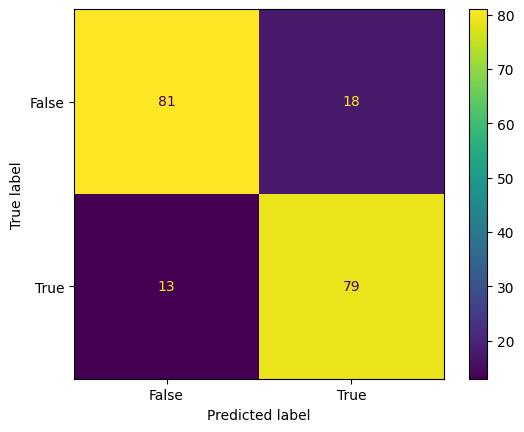

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

KNN bagging

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [ ]:
parameters = {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, Y_train)

print(gridsearch.best_params_)
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]

{'n_neighbors': 13, 'weights': 'uniform'}


In [ ]:
from sklearn.ensemble import BaggingClassifier
bagged_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights)
bagging_model = BaggingClassifier(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, Y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=13),
                  n_estimators=100)

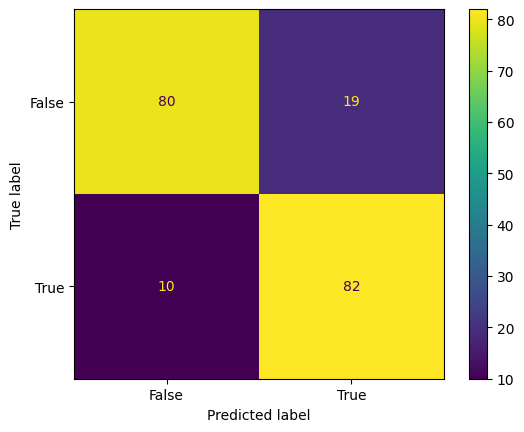

Accuracy: 0.8481675392670157


In [ ]:
test_preds_grid = bagging_model.predict(X_test)
cm = confusion_matrix(Y_test, test_preds_grid)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

PCA

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
sc = StandardScaler()
Y_train = train_data['classLabel']
train_data_x = train_data.drop(columns = ['classLabel'])
Y_test = val_data['classLabel']
val_data_x  = val_data.drop(columns = ['classLabel'])

X_train = sc.fit_transform(train_data_x)
X_test = sc.transform(val_data_x)

pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance

array([0.19966001, 0.10301551])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7801047120418848


Logistic Regression

In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

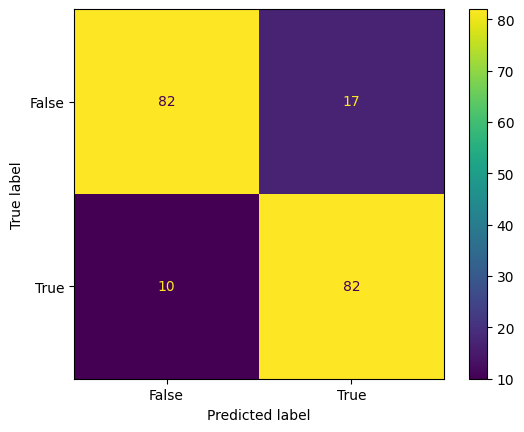

Accuracy: 0.8586387434554974


In [ ]:
# making confusion matrix between
#  test set of Y and predicted value.

 
cm = confusion_matrix(Y_test, y_pred)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

First attempts of training logistic regression gave very bad results. Then I noticed output value in training set wasn't distributed evenly.